<a href="https://colab.research.google.com/github/jeswitha2003/CO2_Emission_Comparision/blob/main/CO2_Emission_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
# from ace_tools import display_dataframe_to_user # Removed due to ModuleNotFoundError

# Real-world constants
petrol_emission_per_km = 154  # g CO2/km
diesel_emission_per_km = 134  # g CO2/km
ev_energy_per_km = 0.18       # kWh/km
grid_emission_per_kwh = 371   # g CO2/kWh (Germany)

# Create dataset for distances from 10 to 100 km (in steps of 10)
distances = list(range(10, 110, 10))

# Calculate emissions
data = {
    "Distance_km": distances,
    "Petrol_CO2_g": [d * petrol_emission_per_km for d in distances],
    "Diesel_CO2_g": [d * diesel_emission_per_km for d in distances],
    "EV_Energy_kWh": [round(d * ev_energy_per_km, 2) for d in distances],
    "EV_CO2_g": [round(d * ev_energy_per_km * grid_emission_per_kwh, 2) for d in distances],
}

# Add CO2 savings
data["CO2_Saved_vs_Petrol_g"] = [data["Petrol_CO2_g"][i] - data["EV_CO2_g"][i] for i in range(len(distances))]
data["CO2_Saved_vs_Diesel_g"] = [data["Diesel_CO2_g"][i] - data["EV_CO2_g"][i] for i in range(len(distances))]

# Create DataFrame
co2_df = pd.DataFrame(data)

display(co2_df)

,Distance_km,Petrol_CO2_g,Diesel_CO2_g,EV_Energy_kWh,EV_CO2_g,CO2_Saved_vs_Petrol_g,CO2_Saved_vs_Diesel_g
0,10,1540,1340,1.8,667.8,872.2,672.2
1,20,3080,2680,3.6,1335.6,1744.4,1344.4
2,30,4620,4020,5.4,2003.4,2616.6,2016.6
3,40,6160,5360,7.2,2671.2,3488.8,2688.8
4,50,7700,6700,9.0,3339.0,4361.0,3361.0
5,60,9240,8040,10.8,4006.8,5233.2,4033.2
6,70,10780,9380,12.6,4674.6,6105.4,4705.4
7,80,12320,10720,14.4,5342.4,6977.6,5377.6
8,90,13860,12060,16.2,6010.2,7849.8,6049.8
9,100,15400,13400,18.0,6678.0,8722.0,6722.0


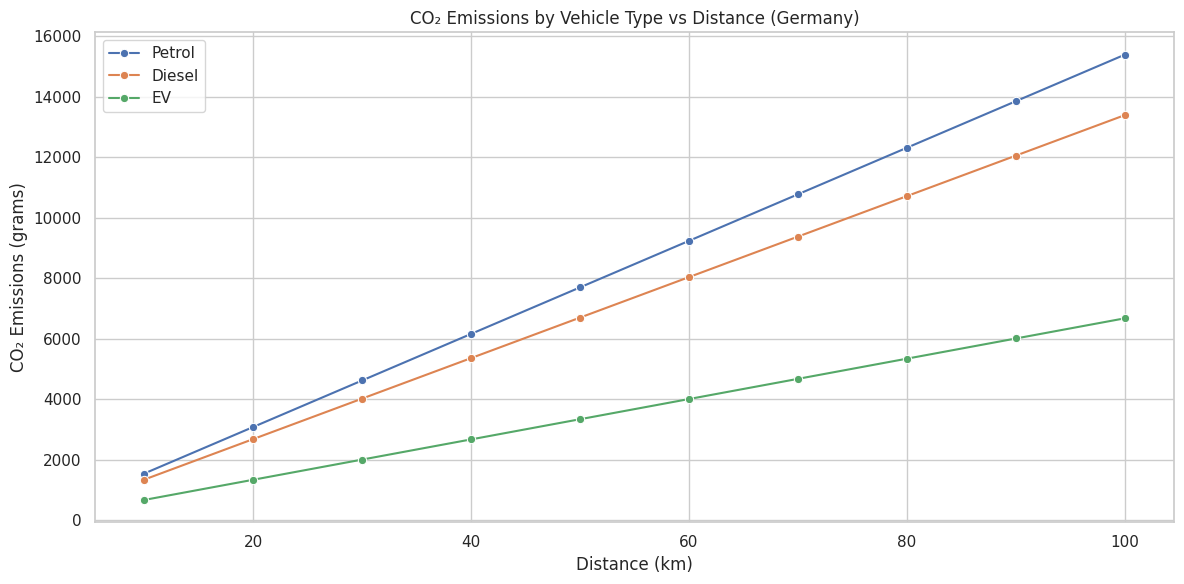

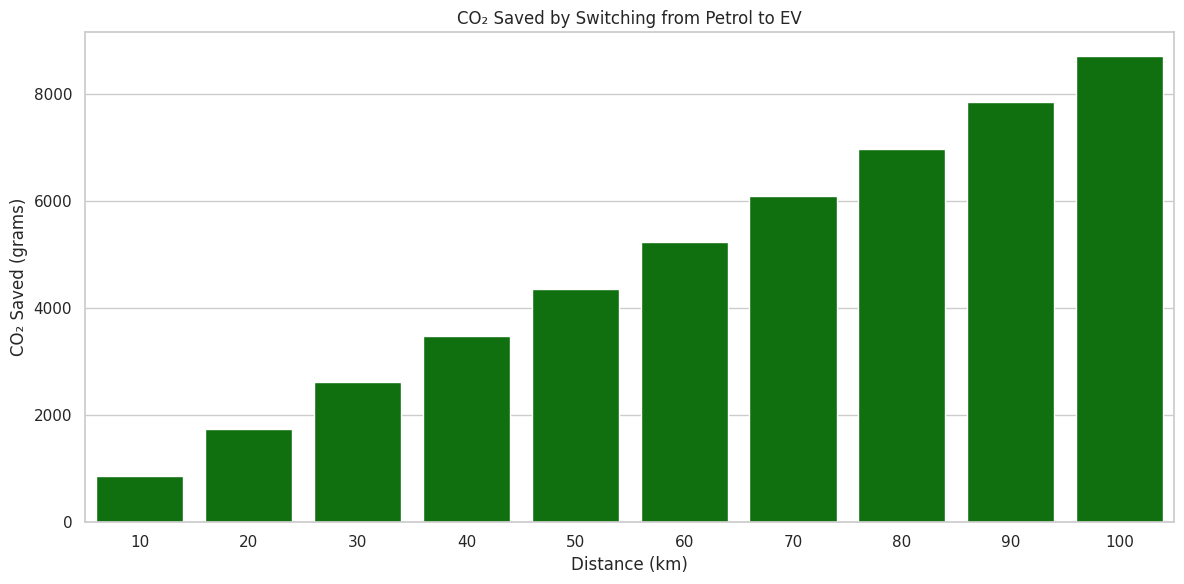

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Plot CO2 emissions by vehicle type
plt.figure(figsize=(12, 6))
sns.lineplot(x="Distance_km", y="Petrol_CO2_g", data=co2_df, label="Petrol", marker='o')
sns.lineplot(x="Distance_km", y="Diesel_CO2_g", data=co2_df, label="Diesel", marker='o')
sns.lineplot(x="Distance_km", y="EV_CO2_g", data=co2_df, label="EV", marker='o')
plt.title("CO₂ Emissions by Vehicle Type vs Distance (Germany)")
plt.xlabel("Distance (km)")
plt.ylabel("CO₂ Emissions (grams)")
plt.legend()
plt.tight_layout()
plt.show()

# Plot CO2 savings
plt.figure(figsize=(12, 6))
sns.barplot(x="Distance_km", y="CO2_Saved_vs_Petrol_g", data=co2_df, color='green')
plt.title("CO₂ Saved by Switching from Petrol to EV")
plt.xlabel("Distance (km)")
plt.ylabel("CO₂ Saved (grams)")
plt.tight_layout()
plt.show()
